## Decision Tree Classification

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('titanic.csv')
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [3]:
df.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


In [4]:
# checking which column has null values
df.columns[df.isnull().any()]

Index(['Age', 'Embarked'], dtype='object')

<AxesSubplot:>

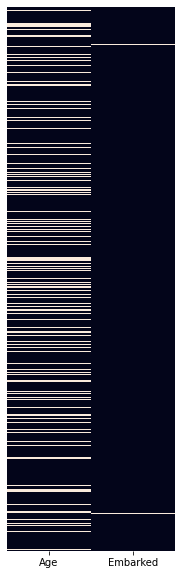

In [5]:
# Cheaking how many null values in ['Age', 'Embarked'] using heatmap
plt.figure(figsize=(3, 10))
sns.heatmap(df[['Age', 'Embarked']].isnull(), yticklabels=False, cbar=False)

In [6]:
# we got many null value in age column
# we will fill them with Pclass wise average age
avg_age = df[['Age', 'Pclass']].groupby('Pclass').mean().apply(round)
avg_age

,Age
Pclass,
1,38.0
2,30.0
3,25.0


In [7]:
# a function to fill the avg. age (Pclass wise)
def fill_age(col):
    age, pclass = col[0], col[1]
    if pd.isnull(age):
        return avg_age['Age'][pclass]
    return age

df.Age = df[['Age', 'Pclass']].apply(fill_age, axis=1)

In [8]:
df.dropna(inplace=True) # droping any other null values

<AxesSubplot:xlabel='Survived', ylabel='Age'>

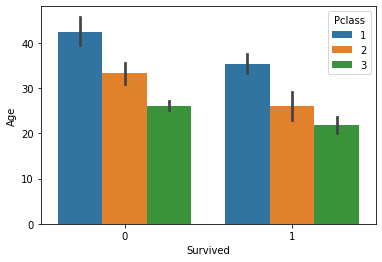

In [9]:
# Relation between Age and Survived
sns.barplot('Survived', 'Age', hue='Pclass', data=df)

In [10]:
df.Sex = df.Sex.map({'male': 1, 'female': 0})

In [11]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Survived'>

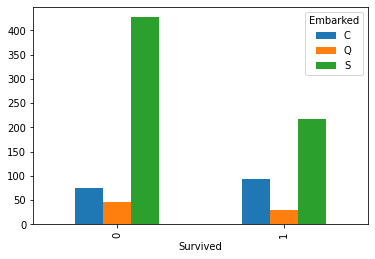

In [12]:
# Relation between Embarked and Survived
pd.crosstab(df['Survived'], df['Embarked']).plot(kind='bar')

In [13]:
df.Embarked = df.Embarked.map({'C': 0, 'Q': 1, 'S': 2})

In [14]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


## Model

In [15]:
model = DecisionTreeClassifier()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1), df.Survived, test_size=0.2)
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
model.score(X_test, y_test)

0.797752808988764

Text(33.0, 0.5, 'Truth')

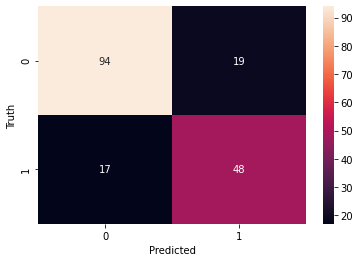

In [18]:
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm, annot=True, cmap='rocket')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [19]:
model.predict([[1, 1, 25, 5, 6, 35, 2]])

array([1], dtype=int64)